In [8]:
!wget https://www.dropbox.com/sh/i69phswf2fcxbn7/AAD6v2NXhAgeAfp6bW7UU-sEa?dl=0

--2019-08-25 11:51:51--  https://www.dropbox.com/sh/i69phswf2fcxbn7/AAD6v2NXhAgeAfp6bW7UU-sEa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/i69phswf2fcxbn7/AAD6v2NXhAgeAfp6bW7UU-sEa [following]
--2019-08-25 11:51:51--  https://www.dropbox.com/sh/raw/i69phswf2fcxbn7/AAD6v2NXhAgeAfp6bW7UU-sEa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca2247aab1f8b486ea3a27ca2c5.dl.dropboxusercontent.com/zip_by_token_key?key=AnS81GgvMP9vekd_FJgABXWmP1nzbvsBe5nEdY-AxjqhluSVHOdMsLlh_lX_QCQWGz7IFyWd_DQxka2sWzu3grNY-OKkYg6w3HTVWMTMcms-6maC28LKtTultzDPFNfBM58Bo6j4OT1YN51wg2xg0xo8K1xN1tKACJTo3AbtjGaWribadmJyehYlsxirwLCkudni1bmXcCTwyo_XX9gDL8tk [following]
--2019-08-25 11:51:52--  https://uca2247aab1f8b486ea3a27ca2c5.dl.dropboxuser

In [9]:
!ls

'AAD6v2NXhAgeAfp6bW7UU-sEa?dl=0'   sample_data


In [0]:
!mv AAD6v2NXhAgeAfp6bW7UU-sEa?dl=0 PoKedata.zip

In [11]:
!unzip PoKedata.zip

Archive:  PoKedata.zip
mapname:  conversion of  failed
   creating: Test/
   creating: Train/
   creating: Test/Pikachu/
   creating: Train/Pikachu/
   creating: Test/Balbasaur/
   creating: Train/Balbasaur/
   creating: Test/Charmender/
   creating: Train/Charmender/
 extracting: Train/Pikachu/391.jpg   
 extracting: Test/Pikachu/2030.jpg   
 extracting: Test/Pikachu/2022.jpg   
 extracting: Train/Pikachu/319.jpg   
 extracting: Train/Pikachu/377.jpg   
 extracting: Train/Pikachu/337.jpg   
 extracting: Train/Pikachu/386.jpg   
 extracting: Train/Pikachu/373.jpg   
 extracting: Train/Pikachu/353.jpg   
 extracting: Train/Pikachu/357.jpg   
 extracting: Test/Pikachu/2016.jpg   
 extracting: Train/Pikachu/358.jpg   
 extracting: Train/Pikachu/304.jpg   
 extracting: Train/Pikachu/359.jpg   
 extracting: Train/Pikachu/363.jpg   
 extracting: Train/Pikachu/362.jpg   
 extracting: Train/Pikachu/385.jpg   
 extracting: Train/Pikachu/352.jpg   
 extracting: Train/Pikachu/321.jpg   
 extracti

In [0]:
import os

#os.listdir("Train/Balbasaur")

In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt


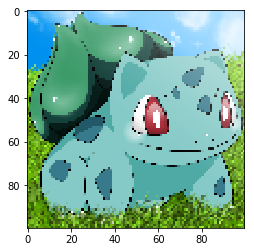

In [20]:
img = image.load_img("Train/Balbasaur/425.jpg",target_size=(100,100))
img = image.img_to_array(img)/255.0
#img[:,:,1:] = 0
plt.imshow(img)
plt.show()

In [14]:
# CNN Model
from keras.models import Sequential
from keras.layers import *

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(GlobalAveragePooling2D())

# Classifier
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 128)               0         
__________

In [0]:
# Data Loader with Augmentation
train_datagen = image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale = 1.0/255,
    horizontal_flip=True)

val_datagen = image.ImageDataGenerator(
    rescale = 1.0/255,
)

In [16]:
train_loader = train_datagen.flow_from_directory('Train',
                                               batch_size=32,
                                               class_mode='categorical',
                                               target_size = (100,100),
                                               shuffle=True)

val_loader = val_datagen.flow_from_directory('Test',
                                               batch_size=32,
                                               class_mode='categorical',
                                               target_size = (100,100),
                                               shuffle=True)

Found 297 images belonging to 3 classes.
Found 123 images belonging to 3 classes.


(32, 100, 100, 3) (32, 3)


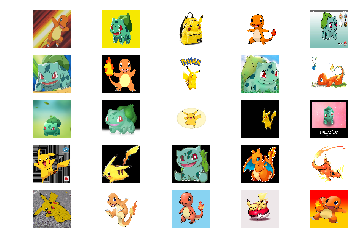

In [17]:
for x,y in val_loader:
    print(x.shape,y.shape)
    
   
    for i in range(25):
        
        plt.subplot(5,5,i+1)
        plt.imshow(x[i])
        plt.axis("off")
        
    
    plt.show()
    break
    

In [19]:
hist = model.fit_generator(train_loader,
                           epochs=50,
                           steps_per_epoch=10,
                           shuffle=True,
                           validation_data=val_loader,
                          validation_steps=2)

Epoch 1/50
 6/10 [=================>............] - ETA: 7s - loss: 1.0656 - acc: 0.4948

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


10/10 [==============================] - 16s 2s/step - loss: 1.0222 - acc: 0.5461 - val_loss: 0.9672 - val_acc: 0.5000
Epoch 2/50
10/10 [==============================] - 10s 1s/step - loss: 0.7755 - acc: 0.6853 - val_loss: 0.6907 - val_acc: 0.5424
Epoch 3/50
10/10 [==============================] - 10s 975ms/step - loss: 0.6101 - acc: 0.7022 - val_loss: 0.7263 - val_acc: 0.7031
Epoch 4/50
10/10 [==============================] - 10s 1s/step - loss: 0.5843 - acc: 0.7003 - val_loss: 0.5701 - val_acc: 0.6610
Epoch 5/50
10/10 [==============================] - 10s 986ms/step - loss: 0.4767 - acc: 0.7715 - val_loss: 0.6505 - val_acc: 0.6250
Epoch 6/50
10/10 [==============================] - 10s 1s/step - loss: 0.4713 - acc: 0.7790 - val_loss: 0.6402 - val_acc: 0.7966
Epoch 7/50
10/10 [==============================] - 10s 1s/step - loss: 0.4352 - acc: 0.8197 - val_loss: 0.5448 - val_acc: 0.7969
Epoch 8/50
10/10 [==============================] - 10s 1s/step - loss: 0.4138 - acc: 0.8460 - 

KeyboardInterrupt: ignored

In [21]:
img.shape

(100, 100, 3)

In [0]:
img = img.reshape(1,100,100,3)

In [0]:
pred = np.argmax(model.predict(img),axis=1)[0]

In [38]:
name2idx = train_loader.class_indices
idx2name = dict( (name2idx[k],k) for k in name2idx.keys())
print(idx2name)
print(name2idx)

{0: 'Balbasaur', 1: 'Charmender', 2: 'Pikachu'}
{'Balbasaur': 0, 'Charmender': 1, 'Pikachu': 2}


In [43]:
output = idx2name[pred]
print(output)

Balbasaur
